In [ ]:
#########################################################
'''
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
'''
##########################################################

# 1) Gathering

In [31]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json

# These are what I got after sign up for the account..
consumer_key = 'acO6zWDb1MLuvvZWBB2rOEyTo'
consumer_secret = 'fQyT7SYS4wODkkiwJqh1alLV3zm84hPTc8kxl3uCJrwfEHJ5zJ'
access_token = '445850628-2FeZGXCjLIKM2jtaKpimvBl4UMbXbImDN55hrVmY'
access_secret = 'yE2oMQ0MQxGdSiN26l5tlGVehLnWYZgIjSk36KFbLk6CE'

In [3]:
# I have a list of tweet ids for which I would like to download their text content. Is there any easy solution to do this, 
#preferably through a Python script? I had a look at other libraries like Tweepy and things don't appear to work so simple, and 
#downloading them manually is out of the question since my list is very long.
###############################################################################################################################
# 1) You can access specific tweets by their id with the `statuses/show/:id` API route. 
# Most Python Twitter libraries follow the exact same patterns, or offer 'friendly' names for the methods.
# For example, The tweepy library uses `tweepy.API(auth).get_status()' that lets you load specific tweets:
# Note that setting the tweet_mode parameter to 'extended' in the get_status call, i.e.,
# `api.get_status(tweet_id, tweet_mode='extended')`..

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [13]:
arch.query('tweet_id == "681340665377193000"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##############################################################################################################################

In [12]:
# So let's begin..
# data_01

arch = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L8/data/dog/twitter-archive-enhanced.csv')
arch.head(2) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Tweet data is stored in JSON format by Twitter. 
Getting tweet JSON data via **tweet ID** using **Tweepy** is described well in this StackOverflow answer. ( https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id ) Note that setting the **tweet_mode** parameter to **'extended'** in the **get_status** call, i.e., **api.get_status(tweet_id, tweet_mode='extended')**, can be useful.

* Also, note that **some tweets** corresponding to a few **tweet IDs** in the archive may have been deleted. Try-except blocks ( https://wiki.python.org/moin/HandlingExceptions ) may come in handy here.

* Twitter's API has a rate limit. Rate limiting is used to control the rate of traffic sent or received by a server. Rate limits are divided into **15 minute** intervals. To query all of the **tweet IDs** in the WeRateDogs Twitter archive, **20-30 minutes** of running time can be expected. 
 - **Printing out each tweet ID** after it was queried and **Using a code timer** ( https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python ) were both helpful for **sanity reasons**. Setting the **wait_on_rate_limit** and **wait_on_rate_limit_notify** parameters to **True** in the tweepy.api class ( http://docs.tweepy.org/en/v3.2.0/api.html#API ) is useful as well.

###############################################################################################################################
After querying each **tweet ID**, you will write its JSON data to the required **'tweet_json.txt'** file with each tweet's JSON data on its own line. You will then read this file, line by line, to create a pandas DataFrame that you will soon assess and clean. 
( http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ )

In [ ]:
# Getting tweet JSON data via tweet ID using Tweepy 
# some tweet ID does not have tweet...so it will throw some errors in the end.. 
# It's not everyting ?

for i in arch.tweet_id:
    tweet = tweepy.API(auth).get_status(i, tweet_mode='extended', wait_on_rate_limit =True,wait_on_rate_limit_notify = True)
    print(tweet._json)    

In [5]:
from datetime import datetime 

'''
start_time = datetime.now() 

# INSERT YOUR CODE #

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

'''

"\nstart_time = datetime.now() \n\n# INSERT YOUR CODE #\n\ntime_elapsed = datetime.now() - start_time \nprint('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))\n\n"

In [6]:
# Note: when collecting a bunch of JSON data, plz store them 'under the key of a future dict'.
# there are some IDs inwhich tweet does not exist and we need to capture that..and handle that..
# try ~ except: capturing 'success' ~ 'failure' !!!

dic_CNT ={}
dic_CNT['InNeed'] = []

error_dict = {}

id_list = list(arch.tweet_id)

for i in id_list:
    try:
        indexing = id_list.index(i) + 1
        
        start_time = datetime.now() #####

        tweet = tweepy.API(auth).get_status(i, tweet_mode='extended', wait_on_rate_limit =True, wait_on_rate_limit_notify = True)
        tw_id = tweet._json['id_str']
        ret_ct = tweet._json['retweet_count']
        fav_ct = tweet._json['favorite_count']
        
        dic_CNT['InNeed'].append({'tweet_id': tw_id, 'retweet_cnt': ret_ct, 'favorite_cnt': fav_ct})
        
#    except Exception as e: #wrong
#        print(str(order) + "_" + i + ": " + str(e)) #wrong
#        tweet_error[str(order) + "_" + i] = tw_id #wrong
    
    except tweepy.TweepError as err:
        error_dict[indexing] = err
        print(err)
        
    time_elapsed = datetime.now() - start_time #####
    
    print('tweet_ID: {}'.format(tw_id))
    print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))


tweet_ID: 892420643555336193
Time elapsed (hh:mm:ss.ms) 0:00:01.352143
tweet_ID: 892177421306343426
Time elapsed (hh:mm:ss.ms) 0:00:00.235909
tweet_ID: 891815181378084864
Time elapsed (hh:mm:ss.ms) 0:00:00.228510
tweet_ID: 891689557279858688
Time elapsed (hh:mm:ss.ms) 0:00:00.349787
tweet_ID: 891327558926688256
Time elapsed (hh:mm:ss.ms) 0:00:00.258926
tweet_ID: 891087950875897856
Time elapsed (hh:mm:ss.ms) 0:00:00.267043
tweet_ID: 890971913173991426
Time elapsed (hh:mm:ss.ms) 0:00:00.265766
tweet_ID: 890729181411237888
Time elapsed (hh:mm:ss.ms) 0:00:00.294027
tweet_ID: 890609185150312448
Time elapsed (hh:mm:ss.ms) 0:00:00.481343
tweet_ID: 890240255349198849
Time elapsed (hh:mm:ss.ms) 0:00:00.349857
tweet_ID: 890006608113172480
Time elapsed (hh:mm:ss.ms) 0:00:00.287364
tweet_ID: 889880896479866881
Time elapsed (hh:mm:ss.ms) 0:00:00.300619
tweet_ID: 889665388333682689
Time elapsed (hh:mm:ss.ms) 0:00:00.276521
tweet_ID: 889638837579907072
Time elapsed (hh:mm:ss.ms) 0:00:00.247396
tweet_

Rate limit reached. Sleeping for: 585


tweet_ID: 758740312047005698
Time elapsed (hh:mm:ss.ms) 0:09:50.387690
tweet_ID: 758474966123810816
Time elapsed (hh:mm:ss.ms) 0:00:00.343347
tweet_ID: 758467244762497024
Time elapsed (hh:mm:ss.ms) 0:00:00.280076
tweet_ID: 758405701903519748
Time elapsed (hh:mm:ss.ms) 0:00:00.280003
tweet_ID: 758355060040593408
Time elapsed (hh:mm:ss.ms) 0:00:00.236780
tweet_ID: 758099635764359168
Time elapsed (hh:mm:ss.ms) 0:00:00.282652
tweet_ID: 758041019896193024
Time elapsed (hh:mm:ss.ms) 0:00:00.246883
tweet_ID: 757741869644341248
Time elapsed (hh:mm:ss.ms) 0:00:00.240751
tweet_ID: 757729163776290825
Time elapsed (hh:mm:ss.ms) 0:00:00.229161
tweet_ID: 757725642876129280
Time elapsed (hh:mm:ss.ms) 0:00:00.330737
tweet_ID: 757611664640446465
Time elapsed (hh:mm:ss.ms) 0:00:00.229950
tweet_ID: 757597904299253760
Time elapsed (hh:mm:ss.ms) 0:00:00.329235
tweet_ID: 757596066325864448
Time elapsed (hh:mm:ss.ms) 0:00:00.245300
tweet_ID: 757400162377592832
Time elapsed (hh:mm:ss.ms) 0:00:00.264004
tweet_

Rate limit reached. Sleeping for: 595


tweet_ID: 676975532580409345
Time elapsed (hh:mm:ss.ms) 0:10:00.405186
tweet_ID: 676957860086095872
Time elapsed (hh:mm:ss.ms) 0:00:00.265889
tweet_ID: 676949632774234114
Time elapsed (hh:mm:ss.ms) 0:00:00.491877
tweet_ID: 676948236477857792
Time elapsed (hh:mm:ss.ms) 0:00:00.276025
tweet_ID: 676946864479084545
Time elapsed (hh:mm:ss.ms) 0:00:00.949932
tweet_ID: 676942428000112642
Time elapsed (hh:mm:ss.ms) 0:00:00.611439
tweet_ID: 676936541936185344
Time elapsed (hh:mm:ss.ms) 0:00:00.229643
tweet_ID: 676916996760600576
Time elapsed (hh:mm:ss.ms) 0:00:00.245279
tweet_ID: 676897532954456065
Time elapsed (hh:mm:ss.ms) 0:00:00.281410
tweet_ID: 676864501615042560
Time elapsed (hh:mm:ss.ms) 0:00:00.230656
tweet_ID: 676821958043033607
Time elapsed (hh:mm:ss.ms) 0:00:00.251392
tweet_ID: 676819651066732545
Time elapsed (hh:mm:ss.ms) 0:00:00.278299
tweet_ID: 676811746707918848
Time elapsed (hh:mm:ss.ms) 0:00:00.274206
tweet_ID: 676776431406465024
Time elapsed (hh:mm:ss.ms) 0:00:00.283196
tweet_

In [7]:
# check the output

dic_CNT

{'InNeed': [{'favorite_cnt': 39039,
   'retweet_cnt': 8667,
   'tweet_id': '892420643555336193'},
  {'favorite_cnt': 33439,
   'retweet_cnt': 6367,
   'tweet_id': '892177421306343426'},
  {'favorite_cnt': 25205,
   'retweet_cnt': 4228,
   'tweet_id': '891815181378084864'},
  {'favorite_cnt': 42400,
   'retweet_cnt': 8773,
   'tweet_id': '891689557279858688'},
  {'favorite_cnt': 40554,
   'retweet_cnt': 9551,
   'tweet_id': '891327558926688256'},
  {'favorite_cnt': 20350,
   'retweet_cnt': 3168,
   'tweet_id': '891087950875897856'},
  {'favorite_cnt': 11932,
   'retweet_cnt': 2109,
   'tweet_id': '890971913173991426'},
  {'favorite_cnt': 65987,
   'retweet_cnt': 19209,
   'tweet_id': '890729181411237888'},
  {'favorite_cnt': 27936,
   'retweet_cnt': 4328,
   'tweet_id': '890609185150312448'},
  {'favorite_cnt': 32141,
   'retweet_cnt': 7545,
   'tweet_id': '890240255349198849'},
  {'favorite_cnt': 30830,
   'retweet_cnt': 7455,
   'tweet_id': '890006608113172480'},
  {'favorite_cnt': 27

In [8]:
# check the output

for i in error_dict.keys(): 
    print(i)

96
785
383
20
133
119
567
299
156
261


In [28]:
# this is how we write json...

with open('tweet_json.txt', 'w') as out_f:  
    json.dump(dic_CNT, out_f)

NameError: name 'dic_CNT' is not defined

In [113]:
# this is how we read json...

with open('tweet_json.txt') as json_f:  
    data = json.load(json_f)
    for p in data['InNeed']:
        print('tweet_ID: ', p['tweet_id'])
        print('favorite: ', p['favorite_cnt'])
        print('retweet: ', p['retweet_cnt'])
        print('')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [114]:
tw_json = pd.DataFrame(data['InNeed'], columns = ['tweet_id','favorite_cnt','retweet_cnt']); tw_json.head()

NameError: name 'data' is not defined

# 2) Assessing & Cleaning

> __*Key points__ to keep in mind when data wrangling for this project:
 - You only want **[original ratings (no retweets) that have images]**. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
 - Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least **8 quality issues** and at least **2 tidiness issues** in this dataset.
 - Cleaning includes **[merging individual pieces of data]** according to the rules of tidy data. https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
 - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
 - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [33]:
# [Data 01] - arch

# Assess 'arch' (has 2356 entries..need only 2075 entries later---original_rating + image)
# The ratings probably aren't all correct. 
# Same goes for the dog names and probably dog stages (see below for more information on these) too.
arch.info()

'''
# Quality Issue
 -1) Fixing Datatype
 
    - 'tweet_id' should be str
    - 'timestamp' should be datatime
    - 'text' should be str
    - 'name' should be str
 -2) Fixing values
  - In 'rating_numerator' and 'rating_denominator', values should be fixed.
  
 -3) Fixing values 
  - In 'name', inappropriate name, and missing should be fixed. 

# Tidiness Issue
  -1) No need to have columns with too many NaN.
    - in_reply_to_status_id         2278
    - in_reply_to_user_id           2278
    - retweeted_status_id           2175
    - retweeted_status_user_id      2175
    - retweeted_status_timestamp    2175
    - expanded_urls                   59

 -2) wide format
   - 'doggo, floofer, pupper, puppo' These 4 variables shoule be combined into one categorical variable.
   
 -3) wrong format
   - In 'source', some unnecessary char should be stripped off.
 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

"\n# Quality Issue\n -1) Fixing Datatype\n \n    - 'tweet_id' should be str\n    - 'timestamp' should be datatime\n    - 'text' should be str\n    - 'name' should be str\n -2) Fixing values\n  - In 'rating_numerator' and 'rating_denominator', values should be fixed.\n  \n -3) Fixing values \n  - In 'name', inappropriate name, and missing should be fixed. \n\n# Tidiness Issue\n  -1) No need to have columns with too many NaN.\n    - in_reply_to_status_id         2278\n    - in_reply_to_user_id           2278\n    - retweeted_status_id           2175\n    - retweeted_status_user_id      2175\n    - retweeted_status_timestamp    2175\n    - expanded_urls                   59\n\n -2) wide format\n   - 'doggo, floofer, pupper, puppo' These 4 variables shoule be combined into one categorical variable.\n   \n -3) wrong format\n   - In 'source', some unnecessary char should be stripped off.\n \n"

In [34]:
arch.iloc[0:2] # is equal to ... arch.ix[0:1] ..is equal to arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [35]:
#arch.timestamp.sort_values() ##
#sum(arch.duplicated()) ## 0
#arch.column.nunique()
#isinstance(series, suspected_datatype)
arch.isnull().sum(axis=0)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [36]:
# Tidiness -1) No need to have columns with too many NaN.
#    - in_reply_to_status_id         2278 NaN
#    - in_reply_to_user_id           2278 NaN
#    - retweeted_status_id           2175 NaN
#    - retweeted_status_user_id      2175 NaN
#    - retweeted_status_timestamp    2175 NaN
#    - expanded_urls                   59 NaN

arch.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

In [37]:
arch

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


In [38]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


In [699]:
'''
# Tidiness -2) wide format

# Attempt_01. Want to melt a binary table to a single categorical column....but..failed

# - 'doggo, floofer, pupper, puppo' : convert to categorical..
# 97 doggo  
arch[['No', 'doggo']] = pd.get_dummies(arch['doggo'])
arch.drop('No', axis=1, inplace=True)
'''

In [700]:
'''
# 10 floofer
arch[['No', 'floofer']] = pd.get_dummies(arch['floofer'])
arch.drop('No', axis=1, inplace=True)
'''

In [701]:
'''
# 257 pupper
arch[['No', 'pupper']] = pd.get_dummies(arch['pupper'])
arch.drop('No', axis=1, inplace=True)
'''

In [702]:
'''
# 30 puppo
arch[['No', 'puppo']] = pd.get_dummies(arch['puppo'])
arch.drop('No', axis=1, inplace=True)
'''

In [703]:
'''
arch['none'] = arch.doggo + arch.floofer + arch.pupper + arch.puppo
'''

In [704]:
'''
#for i in arch['none']:
#    if i == 0.0:
#        arch['none'] = 1.0
#    else: 
#        arch['none'] = 0.0 ### doesnt work
        
#### this is the best...
arch.none = 1 - arch.none        
'''
'''
arch = pd.melt(arch, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'], 
               var_name='status', value_name='record') 
               
but...this does not work...               
'''

In [231]:
# Tidiness -2) wide format

#   - 'doggo, floofer, pupper, puppo' These 4 variables shoule be combined into one categorical variable.

# Attempt_02.
'''
arch = pd.melt(arch, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'], 
               var_name='status', value_name='phase') does not work...


> One way you can do is using lamba function and combine all records - comma separated..               

arch_copy['pet_names']= arch_copy[arch_copy.columns[7:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

>take a hint from above code. just to let you knwo there were NA values instead of 0 (so you might need to tweak your code)
e,g output 9 doggo,None,None,None..

then try this...

>Substituting substrings to eliminate dirty data from the new column 'pet_names' 

arch_copy['pet_names'] = arch_copy['pet_names'].apply(lambda x: re.sub('None','',x))



# regExp func
re.sub(pattern, repl, string, count=0, flags=0) : 
==> _Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement 
repl. 
_If the pattern isn’t found, string is returned unchanged. 
_repl can be a string or a function; if it is a string, any backslash escapes in it are processed. That is, \n is converted to a 
single newline character, \r is converted to a carriage return, and so forth. Unknown escapes such as \& are left alone. 
_Backreferences, such as \6, are replaced with the substring matched by group 6 in the pattern. 

'''

In [39]:
# work with copy

arch_copy = arch.copy()

In [40]:
arch_copy['pet_temp']= arch_copy[arch_copy.columns[7:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [41]:
import re
arch_copy['pet_temp'] = arch_copy['pet_temp'].apply(lambda x: re.sub(pattern='None',repl='',string=x))

In [42]:
arch_copy.pet_temp.replace(',,,', np.nan, inplace=True)

In [43]:
# work with original

arch['pet_status'] = arch_copy.pet_temp.str.extract('(\w+)', expand=True)
arch.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [44]:
arch

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,pet_status
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


In [45]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
pet_status            380 non-null object
dtypes: int64(3), object(5)
memory usage: 147.3+ KB


In [46]:
# Tidiness -3) 
# the 'source' column should be cleaned up..
arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [47]:
#arch['source_web'] = arch.source.str.extract('(http://.+\...[m]?[itter.com]+?)', expand=True)

ser=[]

for i in range(2356):
    coll = arch.iloc[i,2].split('"')[1]
    ser.append(coll)

source_col = pd.DataFrame({'source_web': ser})

arch = arch.join(source_col)

arch.drop('source', axis=1, inplace=True)

In [48]:
arch.source_web.value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source_web, dtype: int64

In [49]:
# NaN in website source...is 0
arch.source_web.isnull().sum()

0

In [50]:
arch

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,http://twitter.com/download/iphone
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,http://twitter.com/download/iphone
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,http://twitter.com/download/iphone
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,http://twitter.com/download/iphone
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,NaN,http://twitter.com/download/iphone
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,http://twitter.com/download/iphone
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,NaN,http://twitter.com/download/iphone
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,http://twitter.com/download/iphone
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,http://twitter.com/download/iphone


In [51]:
arch.iloc[999, -1]

'http://vine.co'

In [52]:
# Quality -1)  Fixing Datatype Issue
#    - 'tweet_id' should be str
#    - 'text' should be str
#    - 'name' should be str
#    - 'timestamp' should be 'datatime'

arch.tweet_id = arch.tweet_id.astype(str)
arch.iloc[0,0], type(arch.iloc[0,0])

('892420643555336193', str)

In [53]:
arch.iloc[0,2], type(arch.iloc[0,2])

("This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 str)

In [54]:
arch.iloc[0,5], type(arch.iloc[0,5])

('Phineas', str)

In [55]:
arch.iloc[2000,1], type(arch.iloc[0,1])

('2015-12-03 18:52:12 +0000', str)

In [56]:
#arch.timestamp = datetime.strptime(str, "%Y-%m-%d %H:%M:%S") # but what we have is 'Series'...

arch.timestamp = pd.to_datetime(arch.timestamp)
arch.iloc[2000,1], type(arch.iloc[0,1])

(Timestamp('2015-12-03 18:52:12'), pandas.tslib.Timestamp)

In [ ]:
# Quality -2) Fixing values
#  - In 'name', inappropriate, duplicated, and missing name should be fixed. 


In [57]:
# in name... 'None'?, 'a'?, 'an'?, 'very'?, 'the'?, 'not'? 'quite'? 'just'? 'mad'? 'actually'?
#are uspected.. want to put their name as 'NaN'.... 

arch.name.value_counts() ## rows are collapsed so cannot check all values ...
# arch.query('name.value_counts() > 1') #whywhwywhwywhywhywhywhywhwhywhywhywhywhywhywhy? ain't work?
#arch[~(arch.name.unique())] #whywhwywhwywhywhywhywhywhwhywhywhywhywhywhywhy? ain't work?

things = arch['name'].value_counts()
things = things[things > 1]
things.values, things.index.values

(array([745,  55,  12,  11,  11,  11,  10,  10,  10,   9,   9,   8,   8,
          7,   7,   7,   7,   7,   6,   6,   6,   6,   6,   6,   6,   6,
          6,   6,   6,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
          5,   5,   5,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
          4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2

In [58]:
arch.query('name == "a"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
56,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive...,14,10,a,pupper,http://twitter.com/download/iphone
649,792913359805018113,2016-10-31 02:17:31,Here is a perfect example of someone who has t...,13,10,a,NaN,http://twitter.com/download/iphone
801,772581559778025472,2016-09-04 23:46:12,Guys this is getting so out of hand. We only r...,10,10,a,NaN,http://twitter.com/download/iphone
1002,747885874273214464,2016-06-28 20:14:22,This is a mighty rare blue-tailed hammer sherk...,8,10,a,NaN,http://twitter.com/download/iphone
1004,747816857231626240,2016-06-28 15:40:07,Viewer discretion is advised. This is a terrib...,4,10,a,NaN,http://twitter.com/download/iphone
1017,746872823977771008,2016-06-26 01:08:52,This is a carrot. We only rate dogs. Please on...,11,10,a,NaN,http://twitter.com/download/iphone
1049,743222593470234624,2016-06-15 23:24:09,This is a very rare Great Alaskan Bush Pupper....,12,10,a,pupper,http://twitter.com/download/iphone
1193,717537687239008257,2016-04-06 02:21:30,People please. This is a Deadly Mediterranean ...,11,10,a,NaN,http://twitter.com/download/iphone
1207,715733265223708672,2016-04-01 02:51:22,This is a taco. We only rate dogs. Please only...,10,10,a,NaN,http://twitter.com/download/iphone
1340,704859558691414016,2016-03-02 02:43:09,Here is a heartbreaking scene of an incredible...,10,10,a,pupper,http://twitter.com/download/iphone


In [59]:
arch.iloc[1193, 2]

'People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n'

In [60]:
arch.iloc[1207, 2]

'This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9'

In [61]:
arch.query('name == "an"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
759,778396591732486144,2016-09-21 00:53:04,RT @dog_rates: This is an East African Chalupa...,10,10,an,NaN,http://twitter.com/download/iphone
1025,746369468511756288,2016-06-24 15:48:42,This is an Iraqi Speed Kangaroo. It is not a d...,9,10,an,NaN,http://twitter.com/download/iphone
1362,703041949650034688,2016-02-26 02:20:37,This is an East African Chalupa Seal. We only ...,10,10,an,NaN,http://twitter.com/download/iphone
2204,668636665813057536,2015-11-23 03:46:18,This is an Irish Rigatoni terrier named Berta....,10,10,an,NaN,http://twitter.com/download/iphone
2333,666337882303524864,2015-11-16 19:31:45,This is an extremely rare horned Parthenon. No...,9,10,an,NaN,http://twitter.com/download/iphone
2335,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,NaN,http://twitter.com/download/iphone
2349,666051853826850816,2015-11-16 00:35:11,This is an odd dog. Hard on the outside but lo...,2,10,an,NaN,http://twitter.com/download/iphone


In [62]:
arch.iloc[759, 2]

'RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR'

In [63]:
arch.iloc[1025, 2]

"This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt"

In [64]:
arch.iloc[1362, 2]

'This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR'

In [65]:
arch.iloc[2335, 2]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [66]:
arch.iloc[2349, 2]

"This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"

In [67]:
arch.iloc[2333, 2]

'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL'

In [68]:
arch.iloc[2204, 2]

'This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg'

In [69]:
arch.query('name=="very"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
773,776249906839351296,2016-09-15 02:42:54,RT @dog_rates: We only rate dogs. Pls stop sen...,11,10,very,NaN,http://twitter.com/download/iphone
819,770655142660169732,2016-08-30 16:11:18,We only rate dogs. Pls stop sending in non-can...,11,10,very,NaN,http://twitter.com/download/iphone
1031,745422732645535745,2016-06-22 01:06:43,We only rate dogs. Pls stop sending in non-can...,9,10,very,NaN,http://twitter.com/download/iphone
1097,736225175608430592,2016-05-27 15:58:54,We only rate dogs. Please stop sending in non-...,10,10,very,NaN,http://twitter.com/download/iphone
1385,700747788515020802,2016-02-19 18:24:26,We only rate dogs. Pls stop sending in non-can...,11,10,very,NaN,http://twitter.com/download/iphone


In [70]:
arch.iloc[773, 2]

'RT @dog_rates: We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://…'

In [71]:
arch.query('name=="the"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
1527,690360449368465409,2016-01-22 02:28:52,Stop sending in lobsters. This is the final wa...,9,10,the,NaN,http://twitter.com/download/iphone
1603,685943807276412928,2016-01-09 21:58:42,This is the newly formed pupper a capella grou...,8,10,the,pupper,http://twitter.com/download/iphone
1797,677269281705472000,2015-12-16 23:29:14,This is the happiest pupper I've ever seen. 10...,10,10,the,pupper,http://twitter.com/download/iphone
1815,676613908052996102,2015-12-15 04:05:01,This is the saddest/sweetest/best picture I've...,12,10,the,NaN,http://twitter.com/download/iphone
2037,671561002136281088,2015-12-01 05:26:34,This is the best thing I've ever seen so sprea...,13,10,the,NaN,http://twitter.com/download/iphone
2212,668587383441514497,2015-11-23 00:30:28,Never forget this vine. You will not stop watc...,13,10,the,NaN,http://vine.co
2345,666063827256086533,2015-11-16 01:22:45,This is the happiest dog you will ever see. Ve...,10,10,the,NaN,http://twitter.com/download/iphone
2346,666058600524156928,2015-11-16 01:01:59,Here is the Rand Paul of retrievers folks! He'...,8,10,the,NaN,http://twitter.com/download/iphone


In [72]:
arch.iloc[2212, 2]

'Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3'

In [73]:
arch.query('name == "not"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
335,832645525019123713,2017-02-17 17:38:57,There's going to be a dog terminal at JFK Airp...,10,10,not,NaN,http://twitter.com
988,748977405889503236,2016-07-01 20:31:43,What jokester sent in a pic without a dog in i...,10,10,not,NaN,http://twitter.com/download/iphone


In [74]:
arch.iloc[335, 2]

"There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7"

In [75]:
arch.iloc[988, 2]

'What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX'

In [76]:
arch.query('name == "quite"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
118,869988702071779329,2017-05-31 18:47:24,RT @dog_rates: We only rate dogs. This is quit...,12,10,quite,NaN,http://twitter.com/download/iphone
169,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,12,10,quite,NaN,http://twitter.com/download/iphone
193,855459453768019968,2017-04-21 16:33:22,"Guys, we only rate dogs. This is quite clearly...",12,10,quite,NaN,http://twitter.com/download/iphone
2326,666411507551481857,2015-11-17 00:24:19,This is quite the dog. Gets really excited whe...,2,10,quite,NaN,http://twitter.com/download/iphone


In [77]:
arch.iloc[2326, 2]

"This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t"

In [78]:
arch.query('name == "just"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
822,770093767776997377,2016-08-29 03:00:36,RT @dog_rates: This is just downright precious...,12,10,just,doggo,http://twitter.com/download/iphone
1063,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for ...,12,10,just,doggo,http://twitter.com/download/iphone
1457,695095422348574720,2016-02-04 04:03:57,This is just a beautiful pupper good shit evol...,12,10,just,pupper,http://twitter.com/download/iphone
2019,672125275208069120,2015-12-02 18:48:47,This is just impressive I have nothing else to...,11,10,just,NaN,http://twitter.com/download/iphone


In [79]:
arch.iloc[2019, 2] # seems 'just' is about dogs..so move on

'This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP'

In [80]:
arch.query('name == "mad"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
682,788552643979468800,2016-10-19 01:29:35,RT @dog_rates: Say hello to mad pupper. You kn...,13,10,mad,pupper,http://twitter.com/download/iphone
1095,736392552031657984,2016-05-28 03:04:00,Say hello to mad pupper. You know what you did...,13,10,mad,pupper,http://vine.co


In [81]:
arch.iloc[2326, 2]  # seems 'mad' is about dogs..so move on

"This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t"

In [82]:
arch.query('name == "actually"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
1040,744223424764059648,2016-06-18 17:41:06,This is actually a pupper and I'd pet it so we...,12,10,actually,pupper,http://twitter.com/download/iphone
1693,681297372102656000,2015-12-28 02:15:26,This is actually a lion. We only rate dogs. Fo...,12,10,actually,NaN,http://twitter.com/download/iphone


In [83]:
arch.iloc[1693, 2]  

'This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap'

In [84]:
##### Reconvert NaNs entries that suspectible
# in name... 'None'?, 'a'?, 'an'?, 'very'?, 'the'?, 'not'? 

arch.name = arch.name.replace(['None', 'a', 'an', 'very','the', 'not', 'quite', 'actually'], np.nan)

arch.name.count(), arch.name.isnull().sum() ## 1528, 828

(1528, 828)

In [85]:
# Quality 3) In 'rating_numerator' and 'rating_denominator', values should be fixed. 
# rating_numerator has no limit ? so let it be..

arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [86]:
arch.query('rating_numerator == 1776')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776,10,Atticus,NaN,https://about.twitter.com/products/tweetdeck


In [87]:
arch.iloc[979, 2]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [88]:
arch.query('rating_numerator == 960')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
313,835246439529840640,2017-02-24 21:54:03,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,NaN,NaN,http://twitter.com/download/iphone


In [89]:
arch.iloc[313, 2]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [90]:
arch.query('rating_numerator == 420')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
188,855862651834028034,2017-04-22 19:15:32,@dhmontgomery We also gave snoop dogg a 420/10...,420,10,NaN,NaN,http://twitter.com/download/iphone
2074,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,420,10,NaN,NaN,http://twitter.com/download/iphone


In [91]:
arch.iloc[188, 2]

'@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'

In [92]:
arch.iloc[2074, 2]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [93]:
arch.query('rating_numerator == 204')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,204,170,this,NaN,http://twitter.com/download/iphone


In [94]:
arch.iloc[1120, 2]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [95]:
arch.query('rating_numerator == 75')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
340,832215909146226688,2017-02-16 13:11:49,"RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,NaN,http://twitter.com/download/iphone
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,NaN,http://twitter.com/download/iphone


In [96]:
arch.iloc[340, 2]

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [97]:
arch.iloc[695, 2]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [98]:
# rating_denominators should be 10 in a lump..

arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [99]:
arch.rating_denominator = 10

In [100]:
arch

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,http://twitter.com/download/iphone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,http://twitter.com/download/iphone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,http://twitter.com/download/iphone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,http://twitter.com/download/iphone
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,NaN,NaN,http://twitter.com/download/iphone
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,http://twitter.com/download/iphone
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,NaN,NaN,http://twitter.com/download/iphone
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,http://twitter.com/download/iphone
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,http://twitter.com/download/iphone


In [101]:
# [Data 02]

# Assess 'image_p'

image_p = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L8/data/dog/image-predictions.tsv', sep='\t')
image_p.info()

'''
# Quality Issue
 -1) Datatype
    - 'tweet_id' should be str
    - 'img_num' should be str
    
# Tidiness Issue
 -1) Wide format
   - 'p1, p2, p3' These 3 variables shoule be combined into one categorical variable.
   - 'p1_conf, p2_conf, p3_conf' These 3 variables shoule be combined into one categorical variable.
   - 'p1_dog, p2_dog, p3_dog' These 3 variables shoule be combined into one categorical variable.

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


"\n# Quality Issue\n -1) Datatype\n    - 'tweet_id' should be str\n    - 'img_num' should be str\n    \n# Tidiness Issue\n -1) Wide format\n   - 'p1, p2, p3' These 3 variables shoule be combined into one categorical variable.\n   - 'p1_conf, p2_conf, p3_conf' These 3 variables shoule be combined into one categorical variable.\n   - 'p1_dog, p2_dog, p3_dog' These 3 variables shoule be combined into one categorical variable.\n\n"

In [102]:
image_p.iloc[:3, :]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [103]:
# Quality Issue
# -1) Datatype
#    - 'tweet_id' should be str
#    - 'img_num' should be str

type(image_p.iloc[0,0]), type(image_p.iloc[0,2])

(numpy.int64, numpy.int64)

In [104]:
image_p.tweet_id = image_p.tweet_id.astype(str)
image_p.tweet_id.iloc[0], type(image_p.iloc[0,0])

('666020888022790149', str)

In [105]:
image_p.img_num = image_p.img_num.astype(str)
image_p.img_num.iloc[0], type(image_p.iloc[0,2])

('1', str)

In [ ]:
# Tidiness Issue
# -1) Wide format
#   - 'p1, p2, p3' These 3 variables shoule be combined into one categorical variable.
#   - 'p1_conf, p2_conf, p3_conf' These 3 variables shoule be combined into one categorical variable.
#   - 'p1_dog, p2_dog, p3_dog' These 3 variables shoule be combined into one categorical variable.

In [106]:
# p1, p2, p3

image_p = pd.melt(image_p, id_vars=['tweet_id','jpg_url','img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'], 
               var_name='prediction', value_name='result')

In [107]:
# p1_conf, p2_conf, p3_conf

image_p = pd.melt(image_p, id_vars=['tweet_id','jpg_url','img_num','p1_dog','p2_dog','p3_dog', 'prediction', 'result'], 
               var_name='algorithm', value_name='prob')

In [108]:
# p1_dog, p2_dog, p3_dog

image_p = pd.melt(image_p, id_vars=['tweet_id','jpg_url','img_num', 'algorithm','result', 'prob', 'prediction'], 
               var_name='algorithm_num', value_name='dog_assessment')

In [109]:
image_p = image_p.drop(['algorithm', 'prediction'], axis=1)

In [110]:
image_p

,tweet_id,jpg_url,img_num,result,prob,algorithm_num,dog_assessment
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,p1_dog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,p1_dog,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,p1_dog,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,p1_dog,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,p1_dog,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,p1_dog,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,p1_dog,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,p1_dog,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,p1_dog,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,p1_dog,True


In [111]:
image_p.algorithm_num.value_counts()

p1_dog    18675
p3_dog    18675
p2_dog    18675
Name: algorithm_num, dtype: int64

In [112]:
image_p.dog_assessment.value_counts()

True     41256
False    14769
Name: dog_assessment, dtype: int64

In [26]:
# [Data 03]

# Assess 'tw_json` (has 2343 entries..need only 2075 entries later---original_rating + image)

#tw_json['tweet_id'] = tw_json.tweet_ID
#tw_json.drop('tweet_ID', axis=1, inplace=True)
#tw_json.rename(columns = {'tweet_ID':'tweet_id'}, inplace=True)

tw_json.info()
'''
# Tidiness Issue
 -1) merging
   - archive dataset, image dataset, tweet_json dataset should be combined into one. 
 -2) duplicates in our master dataset
   - 
'''

NameError: name 'tw_json' is not defined

In [892]:
tw_json.head(3)

,tweet_id,favorite_cnt,retweet_cnt
0,892420643555336193,39039,8667
1,892177421306343426,33439,6367
2,891815181378084864,25205,4228


In [ ]:
# Tidiness Issue
# -1) merging
#   - archive dataset, image dataset, tweet_json dataset should be combined into one. 
'''
df_new2 = pd.merge(df_new, df_c, on='id', how='inner'/'outer'/'left'/'right')
'''

In [14]:
df_new = pd.merge(arch, image_p, on='tweet_id', how='right')

NameError: name 'image_p' is not defined

In [1068]:
df_new.iloc[0,2]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [1069]:
df_new.isnull().sum()

tweet_id                  0
timestamp                 0
text                      0
rating_numerator          0
rating_denominator        0
name                  17712
pet_status            47358
source_web                0
jpg_url                   0
img_num                   0
result                    0
prob                      0
algorithm_num             0
dog_assessment            0
dtype: int64

In [1084]:
df_new = pd.merge(arch, image_p, on='tweet_id', how='right'); df_new
df_new2 = pd.merge(df_new, tw_json, on='tweet_id', how='inner'); df_new2

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web,jpg_url,img_num,result,prob,algorithm_num,dog_assessment,favorite_cnt,retweet_cnt
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,p1_dog,False,39039,8667
1,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,0.097049,p1_dog,False,39039,8667
2,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,0.097049,p1_dog,False,39039,8667
3,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.085851,p1_dog,False,39039,8667
4,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,0.085851,p1_dog,False,39039,8667
5,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,0.085851,p1_dog,False,39039,8667
6,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.076110,p1_dog,False,39039,8667
7,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,0.076110,p1_dog,False,39039,8667
8,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,0.076110,p1_dog,False,39039,8667
9,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,p2_dog,False,39039,8667


In [1085]:
df_new2.isnull().sum(), df_new2.shape

(tweet_id                  0
 timestamp                 0
 text                      0
 rating_numerator          0
 rating_denominator        0
 name                  17631
 pet_status            47196
 source_web                0
 jpg_url                   0
 img_num                   0
 result                    0
 prob                      0
 algorithm_num             0
 dog_assessment            0
 favorite_cnt              0
 retweet_cnt               0
 dtype: int64, (55863, 16))

In [1086]:
# # Tidiness Issue
# -2) duplicates

df_new2[df_new2.duplicated()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web,jpg_url,img_num,result,prob,algorithm_num,dog_assessment,favorite_cnt,retweet_cnt
17794,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,p1_dog,False,6878,2323
17797,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.081449,p1_dog,False,6878,2323
17800,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.053570,p1_dog,False,6878,2323
17803,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,p2_dog,False,6878,2323
17806,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.081449,p2_dog,False,6878,2323
17809,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.053570,p2_dog,False,6878,2323
17812,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,p3_dog,True,6878,2323
17815,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.081449,p3_dog,True,6878,2323
17818,770414278348247044,2016-08-30 00:14:12,Meet Al Cabone. He's a gangsta puppa. Rather h...,11,10,Al,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.053570,p3_dog,True,6878,2323


In [1087]:
df_new2.duplicated().sum()

9

In [1088]:
df_new3 = df_new2[~(df_new2.duplicated())]; df_new3

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web,jpg_url,img_num,result,prob,algorithm_num,dog_assessment,favorite_cnt,retweet_cnt
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,p1_dog,False,39039,8667
1,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,0.097049,p1_dog,False,39039,8667
2,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,0.097049,p1_dog,False,39039,8667
3,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.085851,p1_dog,False,39039,8667
4,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,0.085851,p1_dog,False,39039,8667
5,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,0.085851,p1_dog,False,39039,8667
6,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.076110,p1_dog,False,39039,8667
7,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,0.076110,p1_dog,False,39039,8667
8,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,0.076110,p1_dog,False,39039,8667
9,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,p2_dog,False,39039,8667


In [1089]:
df_new3.duplicated().sum()

0

# 3) Analyzing, and Visualizing 

 - 3 insights
 - 1 visualization

In [1093]:
# storing the dataset
df_new3 = df_new2[~(df_new2.duplicated())]; df_new3
df_new3.to_csv('twitter_archive_master.csv')

In [85]:
df_new3 = pd.read_csv('twitter_archive_master.csv', encoding='latin-1')

In [86]:
df_new3.drop('Unnamed: 0', axis=1, inplace=True)

In [87]:
df_new3.timestamp = pd.to_datetime(df_new3.timestamp)
df_new3.tweet_id = df_new3.tweet_id.astype(str)
df_new3.img_num = df_new3.img_num.astype(str)

In [88]:
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55854 entries, 0 to 55853
Data columns (total 16 columns):
tweet_id              55854 non-null object
timestamp             55854 non-null datetime64[ns]
text                  55854 non-null object
rating_numerator      55854 non-null int64
rating_denominator    55854 non-null int64
name                  38223 non-null object
pet_status            8667 non-null object
source_web            55854 non-null object
jpg_url               55854 non-null object
img_num               55854 non-null object
result                55854 non-null object
prob                  55854 non-null float64
algorithm_num         55854 non-null object
dog_assessment        55854 non-null bool
favorite_cnt          55854 non-null int64
retweet_cnt           55854 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(9)
memory usage: 6.4+ MB


In [89]:
df_new3.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,pet_status,source_web,jpg_url,img_num,result,prob,algorithm_num,dog_assessment,favorite_cnt,retweet_cnt
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,p1_dog,False,39039,8667


In [90]:
df = df_new3.copy()

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

(0, 20000)

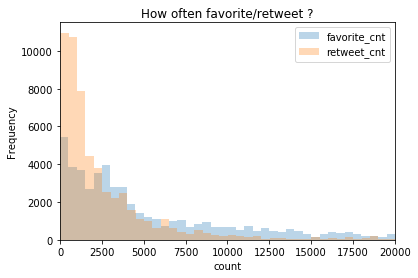

In [84]:
###############################################################################################################################
# people favorite more often than retweet. 

df.favorite_cnt.plot(kind='hist', alpha=0.3, bins=range(min(df.favorite_cnt), max(df.favorite_cnt) + 500, 500))
df.retweet_cnt.plot(kind='hist', alpha=0.3, bins=range(min(df.retweet_cnt), max(df.retweet_cnt) + 500, 500))

plt.xlabel('count')
plt.legend()
plt.title('How often favorite/retweet ?')

plt.xlim(0,20000)

#plt.xticks(range(min(df.retweet_cnt), max(df.retweet_cnt)))
#plt.hist(df.favorite_cnt, alpha=0.3, label='favorite')
#plt.hist(df.retweet_cnt, alpha=0.3, label='retweet')

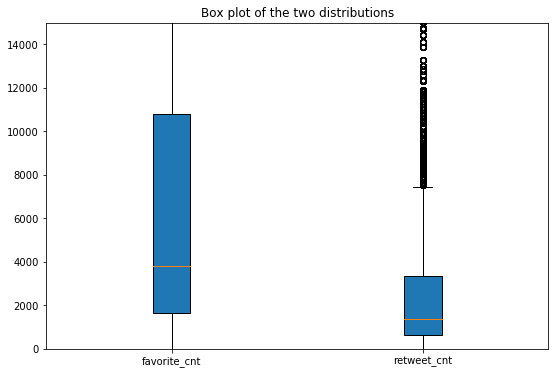

In [40]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

data_to_plot = [df.favorite_cnt, df.retweet_cnt]

# Create the boxplot and get fill color in boxes
bp = ax.boxplot(data_to_plot, patch_artist=True); bp

# Custom x-axis labels
ax.set_xticklabels(['favorite_cnt', 'retweet_cnt'])
plt.ylim(0, 15000)
plt.title('Box plot of the two distributions')

# People more active in favoriting than retweeting
###############################################################################################################################

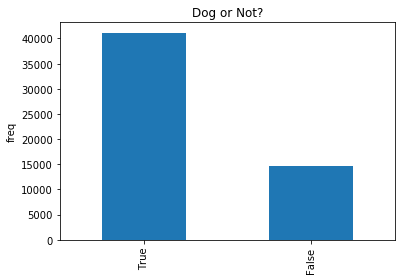

In [11]:
###############################################################################################################################
# some are irrelevant tweets..
df.dog_assessment.value_counts().plot(kind='bar')
plt.ylabel('freq')
plt.title('Dog or Not?')

In [36]:
# higher RATING is somewhat related to funny abnormal tweets(higher rating in 'False'), but favorite and retweet don't...   
df.groupby('dog_assessment').mean()
###############################################################################################################################

,rating_numerator,rating_denominator,prob,favorite_cnt,retweet_cnt
dog_assessment,,,,,
False,14.321429,10.0,0.238799,7561.406735,2824.288980
True,11.527920,10.0,0.272032,8936.093600,2922.160665


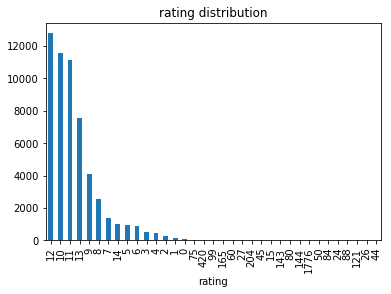

In [43]:
###############################################################################################################################
# rating distribution rating 10, 11, 12, 13 occur most often. 
df.rating_numerator.value_counts().plot(kind='bar')
plt.title('rating distribution')
plt.xlabel('rating')

In [71]:
df.rating_numerator.describe()

count    55854.000000
mean        12.263132
std         40.733019
min          0.000000
25%         10.000000
50%         11.000000
75%         12.000000
max       1776.000000
Name: rating_numerator, dtype: float64

In [75]:
bin_edges = [0,10,11,12,1776] 
bin_names = ['low','medium_1','medium_2','high'] 
df['rating_levels'] = pd.cut(df['rating_numerator'], bin_edges, labels=bin_names)

In [76]:
df.groupby('rating_levels')['favorite_cnt'].mean()

rating_levels
low          3422.118765
medium_1     6515.814216
medium_2    10658.896624
high        20968.792899
Name: favorite_cnt, dtype: float64

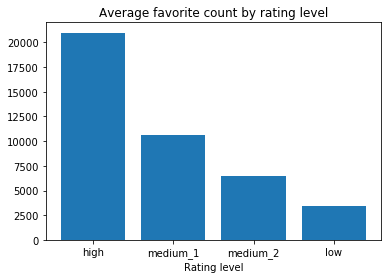

In [80]:
f_levels = df.groupby('rating_levels')['favorite_cnt'].mean()
mean_rating_high =f_levels[3]
mean_rating_med_2 = f_levels[2]
mean_rating_med_1 = f_levels[1]
mean_rating_low = f_levels[0]

rangeis = [1, 2, 3, 4]
heights = [mean_rating_high, mean_rating_med_2, mean_rating_med_1, mean_rating_low]
labels = ['high','medium_1','medium_2','low']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average favorite count by rating level')
plt.xlabel('Rating level')

In [77]:
df.groupby('rating_levels')['retweet_cnt'].mean()

rating_levels
low         1323.591449
medium_1    2338.571890
medium_2    3186.841772
high        7094.405325
Name: retweet_cnt, dtype: float64

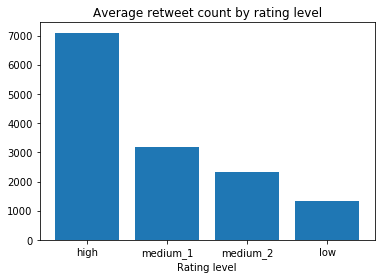

In [81]:
f_levels = df.groupby('rating_levels')['retweet_cnt'].mean()
mean_rating_high =f_levels[3]
mean_rating_med_2 = f_levels[2]
mean_rating_med_1 = f_levels[1]
mean_rating_low = f_levels[0]

rangeis = [1, 2, 3, 4]
heights = [mean_rating_high, mean_rating_med_2, mean_rating_med_1, mean_rating_low]
labels = ['high','medium_1','medium_2','low']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average retweet count by rating level')
plt.xlabel('Rating level')

In [78]:
# in rating 10, 11, 12, 13, highly related with favorite, retweet count...but in rating 14 is related to 
#the most favorite, retweet count..so it seems a sincere..rating! but 
df.groupby('rating_numerator').mean()
###############################################################################################################################

,rating_denominator,prob,dog_assessment,favorite_cnt,retweet_cnt
rating_numerator,,,,,
0,10.0,0.287021,0.333333,13653.000000,1852.000000
1,10.0,0.263746,0.200000,5641.800000,2493.200000
2,10.0,0.283210,0.185185,2213.444444,1319.555556
3,10.0,0.211024,0.175439,2351.526316,931.684211
4,10.0,0.231790,0.375000,2794.312500,1121.000000
5,10.0,0.250148,0.343137,3782.470588,1269.676471
6,10.0,0.242942,0.375000,2670.281250,1022.687500
7,10.0,0.251168,0.442308,3687.211538,1381.557692
8,10.0,0.239595,0.631579,2408.400000,885.347368


TypeError: 'str' object is not callable

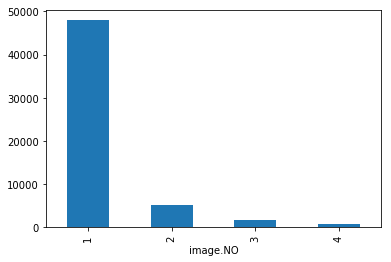

In [92]:
###############################################################################################################################
# image number 01 is sampled the most..
df.img_num.value_counts().plot(kind='bar')
plt.xlabel('image.NO')
plt.ylabel('freq')
plt.title('which image ?')

In [93]:
# if data in image_01 is more reliable...but 'favorite' occur in image_01 less than others.
df.groupby('img_num').mean()
###############################################################################################################################

,rating_numerator,rating_denominator,prob,dog_assessment,favorite_cnt,retweet_cnt
img_num,,,,,,
1,12.260935,10.0,0.258835,0.727364,7871.429698,2688.539891
2,12.428571,10.0,0.286768,0.795918,12775.076531,3943.627551
3,11.742424,10.0,0.295360,0.803030,11710.575758,4212.893939
4,12.451613,10.0,0.301495,0.763441,15597.096774,5378.645161


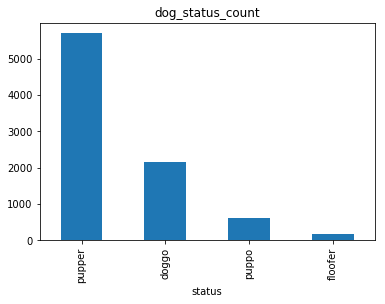

In [94]:
###############################################################################################################################
# pet_status...pupper(youngest) is sampled the most. 
df.pet_status.value_counts().plot(kind='bar')
plt.title('dog_status_count')
plt.xlabel('status')

In [95]:
df.groupby('pet_status').mean()
# but favorite, retweet occur less as to younger dogs..but we are not sure if this is from the picture of dog or not. Plus, 
#pupper has the largest sample size, so it might be hardly affected by outliers, thus shows smaller values as a consequence.  

,rating_numerator,rating_denominator,prob,dog_assessment,favorite_cnt,retweet_cnt
pet_status,,,,,,
doggo,11.862500,10.0,0.272371,0.758333,17302.125000,7474.962500
floofer,12.000000,10.0,0.270840,0.952381,13011.428571,4860.285714
pupper,10.758294,10.0,0.263336,0.707741,6915.909953,2427.090047
puppo,12.000000,10.0,0.301702,0.898551,21398.608696,6475.347826


TypeError: 'str' object is not callable

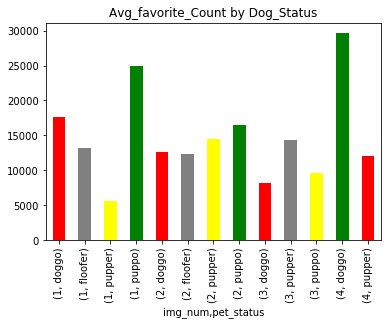

In [100]:
cnt = df.groupby(['img_num','pet_status']).favorite_cnt.mean()
cnt.plot(kind='bar', title='Avg_favorite_Count by Dog_Status', color=['red', 'grey', 'yellow', 'green'])

plt.ylabel('count')

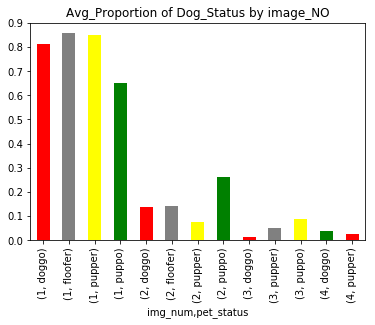

In [102]:
# There are clearly more pupper, image_01 samples than other samples. so it's hard to make a fair comparison. To balance this 
#out, we can divide each count by the total count for that 'pet_status' to use "proportions" instead.

cnt = df.groupby(['img_num','pet_status']).count()['text']
total = df.groupby('pet_status').count()['text']

prop = cnt/total

prop.plot(kind='bar', title='Avg_Proportion of Dog_Status by image_NO', color=['red', 'grey', 'yellow', 'green'])

In [64]:
df.groupby(['img_num','pet_status']).mean()
# As seen above, image_1 has the biggest sample size which is translated into better reliability and here in the group 'image_01'
#, favorite,retweet occur less often as to younger dogs as well.   
###############################################################################################################################

rating_numerator  rating_denominator      prob  \
img_num pet_status                                                   
1       doggo              11.861538                10.0  0.269353   
        floofer            12.000000                10.0  0.276609   
        pupper             10.586592                10.0  0.257243   
        puppo              11.866667                10.0  0.295329   
2       doggo              11.454545                10.0  0.281668   
        floofer            12.000000                10.0  0.236223   
        pupper             11.250000                10.0  0.307469   
        puppo              12.333333                10.0  0.307195   
3       doggo              11.000000                10.0  0.260264   
        pupper             12.272727                10.0  0.279185   
        puppo              12.000000                10.0  0.333018   
4       doggo              13.666667                10.0  0.307715   
        pupper             12.000000                10.0  0.305395   

                    dog_assessment  favorite_cnt   retweet_cnt  
img_num pet_status                                              
1       doggo             0.743590  17658.153846   7773.323077  
        floofer           0.944444  13135.500000   5139.333333  
        pupper            0.679702   5634.357542   1980.055866  
        puppo             0.866667  24906.666667   7535.333333  
2       doggo             0.939394  12660.727273   3193.636364  
        floofer           1.000000  12267.000000   3186.000000  
        pupper            0.958333  14527.437500   4295.812500  
        puppo             1.000000  16548.666667   4815.833333  
3       doggo             1.000000   8167.000000   3376.000000  
        pupper            0.757576  14388.363636   6627.818182  
        puppo             0.833333   9638.000000   3504.000000  
4       doggo             0.333333  29651.666667  18075.000000  
        pupper            0.800000  11999.200000   3209.400000